In [115]:
#Libaries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import sklearn.metrics as metrics
# ignore displaying the warnings
warnings.filterwarnings('ignore')                           

In [116]:
## Code piece to mount my Google Drive
from google.colab import drive 
drive.mount("/content/drive", force_remount=True)

# Change the working directory to that 'Temp' folder
import os
os.chdir('/content/drive/My Drive/Hack4space')

Mounted at /content/drive


In [117]:
df = pd.read_csv('/content/drive/My Drive/Hack4space/pend-gdis-1960-2018-disasterlocations.csv')


In [118]:
print('Rows,', 'Columns')
print(df.shape) 
df.head()

Rows, Columns
(39953, 18)


,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,disasterno,latitude,longitude
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,2009-0631,42.020948,19.418317
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Shkoder,Shkodres,Bushat,Bushat,0,NaN,flood,2009-0631,41.959294,19.514309
2,175,Angola,AGO,540.0,2001,760,Onjiva,3,Cunene,Cuanhama,Onjiva,Onjiva,0,NaN,flood,2001-0146,-17.093484,15.665758
3,187,Angola,AGO,540.0,2009,710,Evale,3,Cunene,Cuanhama,Evale,Evale,0,NaN,flood,2009-0092,-16.531533,15.773987
4,187,Angola,AGO,540.0,2009,749,Mupa,3,Cunene,Cuvelai,Mupa,Mupa,0,NaN,flood,2009-0092,-16.200065,15.844189


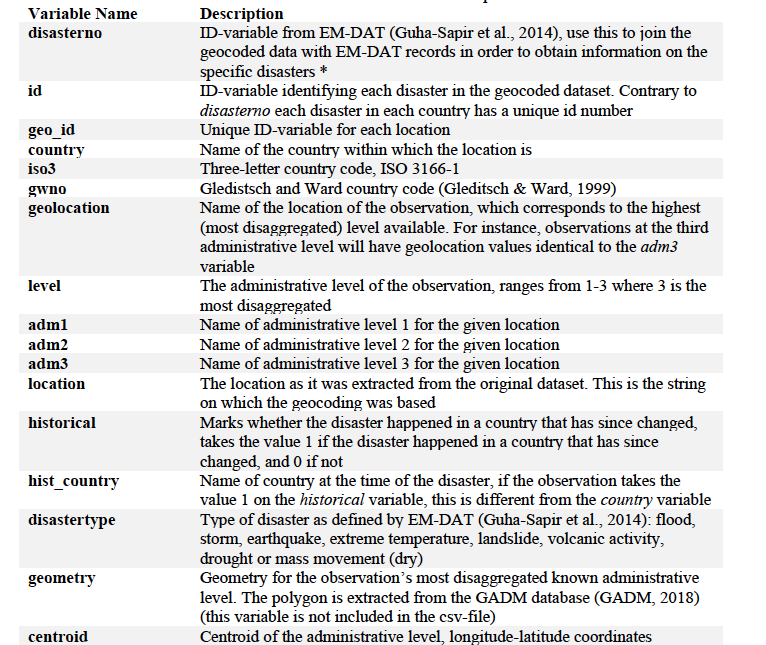

In [119]:
# display general information about the train data set
# good way to check if any features have null values and the levels of categorical variables
pd.DataFrame({'Dtype':df.dtypes,
              'Levels':[df[x].unique() for x in df.columns],
              'Null_Count':df.isna().sum(),
              'Number_Unique_Values':df.nunique()
             })

,Dtype,Levels,Null_Count,Number_Unique_Values
id,object,"[109, 175, 187, 189, 527, 533, 539, 568, 593, ...",0,9924
country,object,"[Albania, Angola, Bangladesh, Belgium, Bolivia...",0,200
iso3,object,"[ALB, AGO, BGD, BEL, BOL, BIH, BRA, CAN, CHL, ...",315,271
gwno,float64,"[339.0, 540.0, 771.0, 211.0, 145.0, 346.0, 140...",434,168
year,int64,"[2009, 2001, 2010, 1995, 1996, 1997, 2000, 200...",0,59
geo_id,int64,"[346, 351, 760, 710, 749, 761, 711, 750, 1875,...",0,39953
geolocation,object,"[Ana E Malit, Bushat, Onjiva, Evale, Mupa, Hat...",0,9874
level,int64,"[3, 2, 1]",0,3
adm1,object,"[Shkoder, Cunene, Chittagong, Dhaka, Sylhet, W...",0,2931
adm2,object,"[Shkodres, Cuanhama, Cuvelai, Noakhali, Tangai...",25883,6263


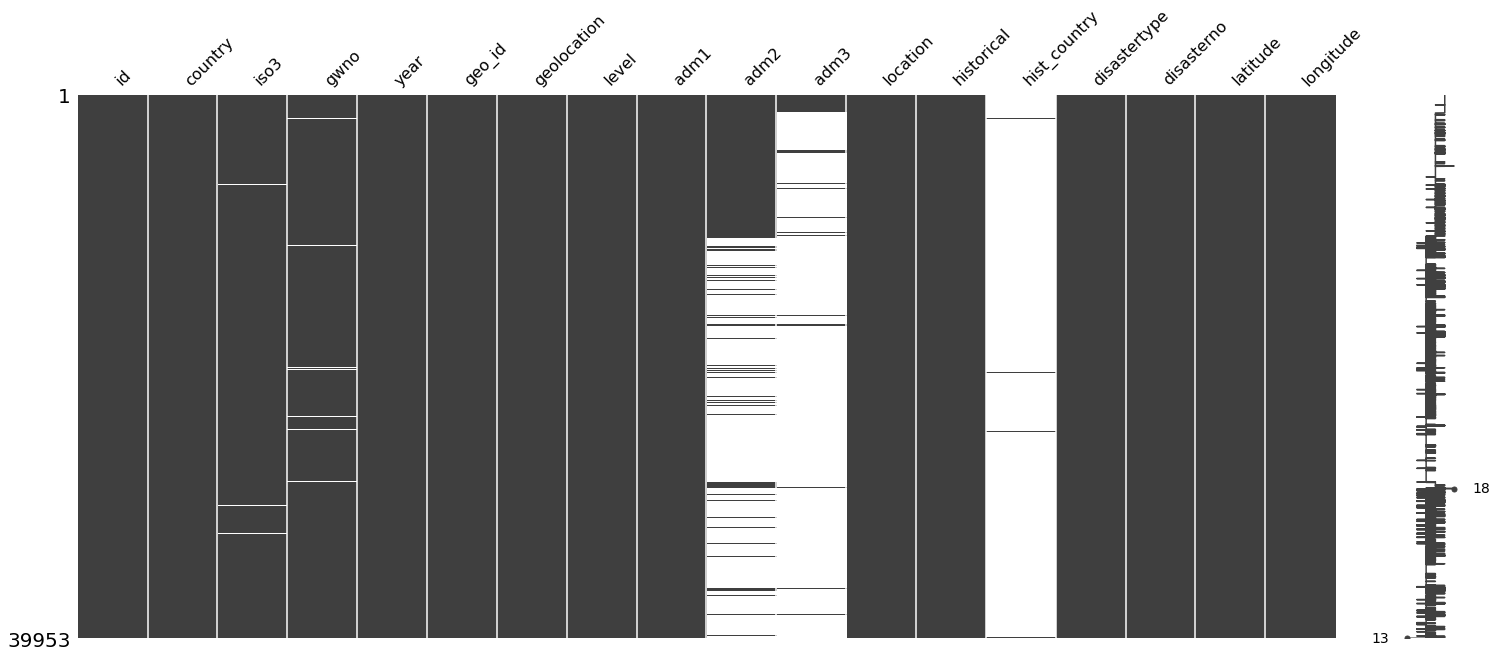

In [120]:
#library to show missing variable
import missingno as msno
msno.matrix(df)
plt.show()

There are many missing variables for adm2&adm3& hist_country. This information is redundant since we already have the name and and country so they will be dropped.

In [121]:
df = df.drop(columns=['adm2', 'adm3','hist_country'])

Since adm2 & adm3 were drop due to missing data we should also drop adm1 to keep consistency 

In [122]:
df = df.drop(columns=['adm1'])

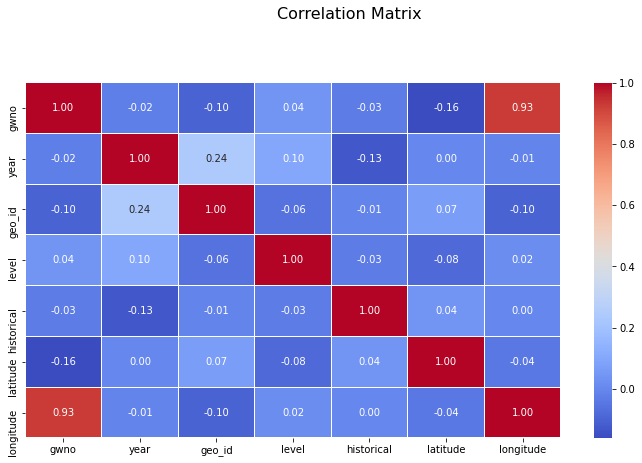

In [123]:
corr1= df.corr()
f, ax = plt.subplots(figsize=(12, 7))
hm = sns.heatmap(round(corr1,2), annot=True, ax=ax, cmap="coolwarm",fmt ='.2f', linewidths=.05)
f.subplots_adjust(top=0.83)
t= f.suptitle('Correlation Matrix', fontsize=16)

Create the same correlation matrix but visualized in a different way.

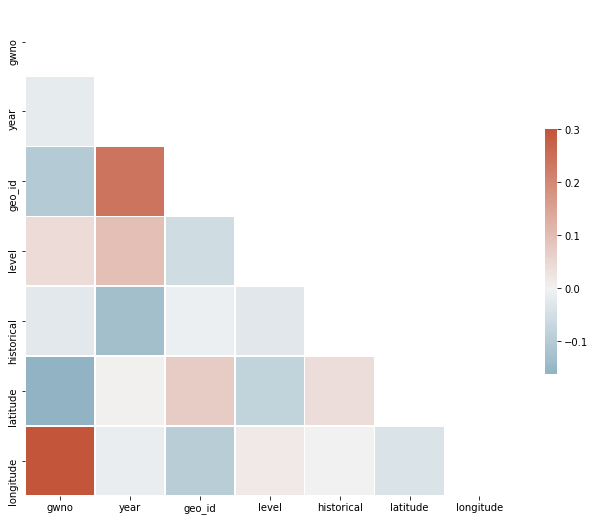

In [124]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<BarContainer object of 8 artists>

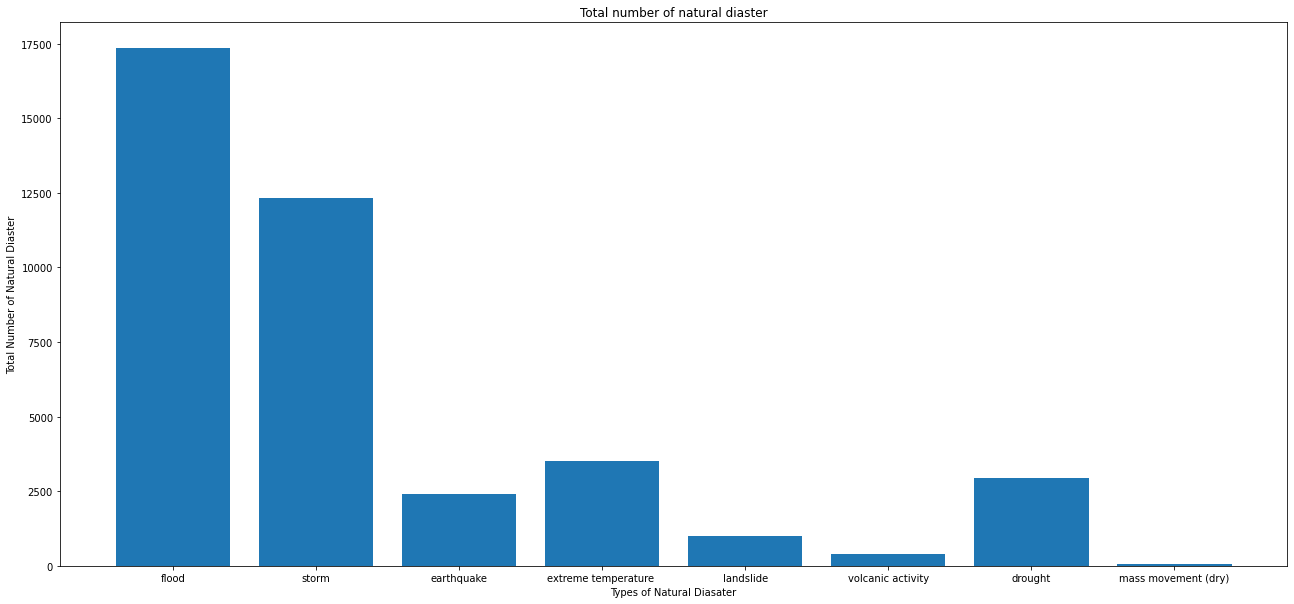

In [125]:
degrees = df["disastertype"]
counts = Counter(degrees)
f, ax = plt.subplots(figsize=(22,10))
plt.title('Total number of natural diaster')
plt.xlabel('Types of Natural Diasater')
plt.ylabel('Total Number of Natural Diaster')

plt.bar(counts.keys(), counts.values())

Floods are the most common natural diaster by a very large margin. Followed by Storm and earthquake. 

<BarContainer object of 59 artists>

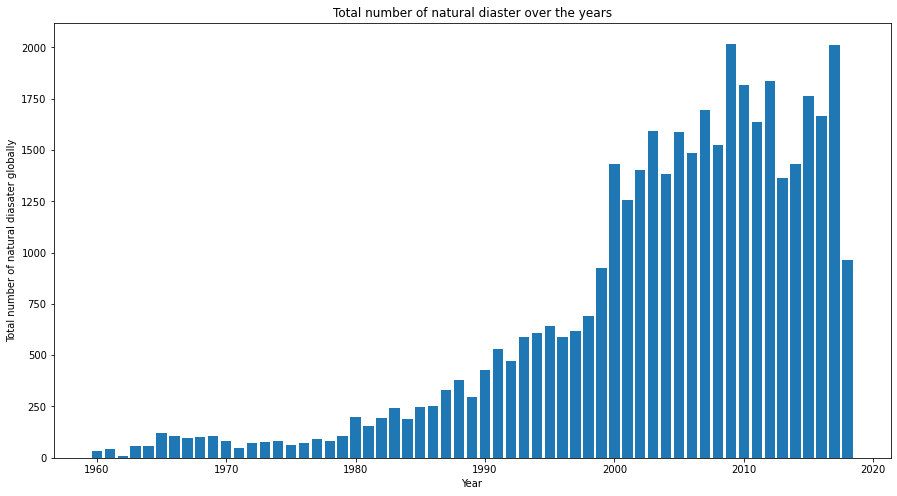

In [126]:
degrees = df["year"]
counts = Counter(degrees)
f, ax = plt.subplots(figsize=(15,8))
plt.title('Total number of natural diaster over the years')
plt.xlabel('Year')
plt.ylabel('Total number of natural diasater globally')
plt.bar(counts.keys(), counts.values())

Astoundingly Yes, there are greater number of disaster in recent years. Particularly in the past 19 years.

Machine Learning Question:What is the probability of a certain natural disaster at a location?

In [128]:
#Data Pre-Processing for ML model.
nomissingdata=df.dropna()

In [129]:
nomissingdata.head()

,id,country,iso3,gwno,year,geo_id,geolocation,level,location,historical,disastertype,disasterno,latitude,longitude
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Ana E Malit,0,flood,2009-0631,42.020948,19.418317
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Bushat,0,flood,2009-0631,41.959294,19.514309
2,175,Angola,AGO,540.0,2001,760,Onjiva,3,Onjiva,0,flood,2001-0146,-17.093484,15.665758
3,187,Angola,AGO,540.0,2009,710,Evale,3,Evale,0,flood,2009-0092,-16.531533,15.773987
4,187,Angola,AGO,540.0,2009,749,Mupa,3,Mupa,0,flood,2009-0092,-16.200065,15.844189


In [130]:
df = nomissingdata
df = df.drop(columns=['id'])
df.shape

(39210, 13)

Next, I will transform the categorical variables into numerical variables

In [131]:
df["disastertype"] = df["disastertype"].astype('category')
df.dtypes
df["disastertype"] = df["disastertype"].cat.codes
df.head()

,country,iso3,gwno,year,geo_id,geolocation,level,location,historical,disastertype,disasterno,latitude,longitude
0,Albania,ALB,339.0,2009,346,Ana E Malit,3,Ana E Malit,0,3,2009-0631,42.020948,19.418317
1,Albania,ALB,339.0,2009,351,Bushat,3,Bushat,0,3,2009-0631,41.959294,19.514309
2,Angola,AGO,540.0,2001,760,Onjiva,3,Onjiva,0,3,2001-0146,-17.093484,15.665758
3,Angola,AGO,540.0,2009,710,Evale,3,Evale,0,3,2009-0092,-16.531533,15.773987
4,Angola,AGO,540.0,2009,749,Mupa,3,Mupa,0,3,2009-0092,-16.200065,15.844189


In [132]:
df["disastertype"]

0        3
1        3
2        3
3        3
4        3
        ..
39942    0
39943    0
39944    0
39945    0
39946    0
Name: disastertype, Length: 39210, dtype: int8

In [133]:
df = df.drop(columns=['geo_id'])
df = df.drop(columns=['disasterno'])

In [134]:

df["iso3"] = df["iso3"].astype('category')
df["iso3"] = df["iso3"].cat.codes

df["country"] = df["country"].astype('category')
df["country"] = df["country"].cat.codes

df["geolocation"] = df["geolocation"].astype('category')
df["geolocation"] = df["geolocation"].cat.codes

df["location"] = df["location"].astype('category')
df["location"] = df["location"].cat.codes



In [135]:
pd.DataFrame({'Dtype':df.dtypes,
              'Levels':[df[x].unique() for x in df.columns],
              'Null_Count':df.isna().sum(),
              'Number_Unique_Values':df.nunique()
             })


,Dtype,Levels,Null_Count,Number_Unique_Values
country,int16,"[1, 3, 10, 12, 16, 17, 19, 25, 29, 43, 48, 51,...",0,169
iso3,int16,"[3, 2, 17, 13, 24, 20, 27, 34, 40, 62, 67, 72,...",0,260
gwno,float64,"[339.0, 540.0, 771.0, 211.0, 145.0, 346.0, 140...",0,168
year,int64,"[2009, 2001, 2010, 1995, 1996, 1997, 2000, 200...",0,59
geolocation,int16,"[318, 1407, 6450, 2667, 5869, 3310, 2928, 3017...",0,9660
level,int64,"[3, 2, 1]",0,3
location,int16,"[7005, 8399, 14880, 9998, 14017, 10819, 10336,...",0,19124
historical,int64,"[0, 1]",0,2
disastertype,int8,"[3, 6, 1, 2, 4, 7, 0, 5]",0,8
latitude,float64,"[42.02094846, 41.95929412, -17.09348436, -16.5...",0,12578


In [136]:
from sklearn.model_selection import train_test_split
X = df.drop('disastertype',axis=1)
y = df['disastertype']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=2020)

Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)

In [140]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_val)
print("Score on Training: ", metrics.accuracy_score(y_true = y_train, y_pred = train_pred))
print("Score on Testing: ",metrics.accuracy_score(y_true = y_val, y_pred = test_pred))

Score on Training:  0.9769009363500565
Score on Testing:  0.7505738332058148


Hyper-parameter tuning

In [141]:
from sklearn.model_selection import GridSearchCV
parameters ={'min_samples_split':[10,20,50,100,200],'max_depth':[3,5,10],'n_estimators':[50,100,200,300]}
grid_cv=GridSearchCV(estimator=rf, param_grid=parameters,cv=5)
grid_cv.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [142]:
grid_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Second Model to improve overfitting

In [151]:
rf2 = RandomForestClassifier(n_estimators=200, max_depth=14,min_samples_leaf=1, min_samples_split=10)
rf2.fit(X_train, y_train)
train_pred = rf2.predict(X_train)
test_pred = rf2.predict(X_val)
print("Score on Training: ", metrics.accuracy_score(y_true = y_train, y_pred = train_pred))
print("Score on Testing: ",metrics.accuracy_score(y_true = y_val, y_pred = test_pred))

Score on Training:  0.8276314351295223
Score on Testing:  0.751934030434413
